In [1]:
import h5py
import numpy as np
import sys
import tensorflow as tf
from tensorflow.keras import layers, optimizers, activations, initializers,regularizers, constraints
from tensorflow.keras.layers import Input, Dense, Activation, BatchNormalization, Flatten, Conv1D,Convolution2D, MaxPooling1D, AlphaDropout, Layer, LSTM, Layer
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix
from tensorflow.keras import layers
#from tensorflow_addons.layers import MultiHeadAttention
import numpy as np
import tensorflow.keras as keras
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import sklearn, json
import scipy.io as io
from sklearn.utils import shuffle
from typing import Any, Dict
import logging, sys
from attention import Attention
logging.disable(sys.maxsize)
path = '/home/maria/'
sys.path.insert(0, path + "AMC/includes")
from clr_callback import *
import matplotlib.pyplot as plt

2022-11-16 09:50:47.589422: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [16]:
classes = ['LFM','2FSK','4FSK','8FSK', 'Costas','2PSK','4PSK','8PSK','Barker','Huffman','Frank','P1','P2','P3','P4','Px','Zadoff-Chu','T1','T2','T3','T4','NM','ruido'] 
dt = np.dtype(float)
dataset_path = path + 'Dataset_23corr/'


In [2]:
classes = ['LFM', 'BFSK', 'BPSK', 'NM', 'SFW', 'SIN', 'EXP', 'BASK']
dataset_path = path + 'Dataset_snrs/'

In [ ]:
with h5py.File(dataset_path +'X_train.mat', 'r') as f:
    X_train = np.array(f['X_train']).T

lbl_train = io.loadmat(dataset_path + 'lbl_train.mat')['lbl_train']
Y_train = io.loadmat(dataset_path + 'Y_train.mat')
Y_train = Y_train['Y_train']

In [4]:
with h5py.File(dataset_path +'Y_val.mat', 'r') as f:
    X_val = np.array(f['Y_val']).T
lbl_val = io.loadmat(dataset_path + 'lbl_val.mat')['lbl_val']

Y_val = io.loadmat(dataset_path + 'Y_val.mat')
Y_val = Y_val['Y_val']

OSError: Unable to open file (unable to open file: name = '/home/maria/Dataset_trials/2/Y_val.mat', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [3]:
with h5py.File(dataset_path +'X_test.mat', 'r') as f:
    X_test = np.array(f['X_test'], dtype='float32').T
Y_test = io.loadmat(dataset_path + 'Y_test.mat')
Y_test = Y_test['Y_test']
lbl_test = io.loadmat(dataset_path + 'lbl_test.mat')['lbl_test']

print("Y test shape: ", Y_test.shape)

Y test shape:  (50400, 8)


In [4]:
np.random.seed(2022)

In [5]:
X_test, Y_test, lbl_test = sklearn.utils.shuffle(X_test[:], Y_test[:],lbl_test[:], random_state=2022)

In [6]:
classes = ['OOK', '4ASK', '8ASK','BPSK', 'QPSK', '8PSK', '16PSK', '32PSK', '16APSK', '32APSK', '64APSK', '128APSK','16QAM', '32QAM', '64QAM', '128QAM', '256QAM', 'AM-SSB-WC', 'AM-SSB-SC', 'AM-DSB-WC', 'AM-DSB-SC', 'FM', 'GMSK', 'OQPSK']
snrs = [-20,-18,-16,-14,-12,-10,-8,-6,-4,-2,0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30]

In [6]:
model = keras.models.load_model("/home/maria/8_signals/3lstm/best_model.h5")

2022-11-16 09:52:59.846404: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-11-16 09:53:00.091989: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-11-16 09:53:00.251113: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA TITAN V computeCapability: 7.0
coreClock: 1.455GHz coreCount: 80 deviceMemorySize: 11.78GiB deviceMemoryBandwidth: 607.97GiB/s
2022-11-16 09:53:00.251145: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-11-16 09:53:00.309059: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2022-11-16 09:53:00.309109: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.10
2022-1

In [10]:
def getConfusionMatrixPlot(true_labels, predicted_labels,title):
    plt.rcParams.update({'font.size': 18})
    # Compute confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels)
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    cm_norm = np.nan_to_num(cm_norm)
    cm = np.round(cm_norm,2)

    # create figure
    width = 18
    height = width / 1.618
    fig = plt.figure(figsize=(width, height))
    plt.clf()
    ax = fig.add_subplot(111)
    ax.set_aspect(1)
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')
    res = ax.imshow(cm, cmap=plt.cm.binary,
                    interpolation='nearest', vmin=0, vmax=1)

    # add color bar
    plt.colorbar(res)

    # annotate confusion entries
    width = len(cm)
    height = len(cm[0])

    for x in range(width):
        for y in range(height):
            ax.annotate(str(cm[x][y]), xy=(y, x), horizontalalignment='center',
                        verticalalignment='center', color=getFontColor(cm[x][y]))

    # add genres as ticks
    alphabet = classes
    plt.xticks(range(width), alphabet[:width], rotation=30)
    plt.yticks(range(height), alphabet[:height])
    plt.title(title)
    return plt


def getFontColor(value):
    if np.isnan(value):
        return "black"
    elif value < 0.2:
        return "black"
    else:
        return "white"

In [11]:
output_path = "/home/maria/8_signals/3lstm"

In [20]:
signal_class = {classes[0]: np.zeros(17), classes[1]: np.zeros(17),classes[2]:np.zeros(17), classes[3] : np.zeros(17),
                classes[4]: np.zeros(17), classes[5]:np.zeros(17), classes[6]:np.zeros(17), classes[7]:np.zeros(17),
                classes[8]:np.zeros(17),classes[9]:np.zeros(17),classes[10]:np.zeros(17),classes[11]:np.zeros(17),
                classes[12]:np.zeros(17),classes[13]:np.zeros(17), classes[14]:np.zeros(17),classes[15]:np.zeros(17),
                classes[16]:np.zeros(17),classes[17]:np.zeros(17),classes[18]:np.zeros(17),classes[19]:np.zeros(17),
                classes[20]:np.zeros(17),classes[21]:np.zeros(17),classes[22]:np.zeros(17)}
snrs = [-12,-10,-8,-6,-4,-2,0,2,4,6,8,10,12,14,16,18,20]

In [8]:
signal_class = {classes[0]: np.zeros(21), classes[1]:
        np.zeros(21),classes[2]:np.zeros(21), classes[3] : np.zeros(21),
        classes[4]: np.zeros(21), classes[5]:np.zeros(21),
        classes[6]:np.zeros(21), classes[7]:np.zeros(21)}
acc={}
snrs = [-20, -18, -16,-14,-12,-10,-8,-6,-4,-2,0,2,4,6,8,10,12,14,16,18,20]


In [8]:
signal_class = {classes[0]: np.zeros(17), classes[1]: np.zeros(17),classes[2]:np.zeros(17), classes[3] : np.zeros(17),
                classes[4]: np.zeros(17), classes[5]:np.zeros(17), classes[6]:np.zeros(17), classes[7]:np.zeros(17)}

In [7]:
snrs = [-12,-10,-8,-6,-4,-2,0,2,4,6,8,10,12,14,16,18,20]

Overall Accuracy:  0.16583333333333333
Overall Accuracy:  0.2075
Overall Accuracy:  0.30416666666666664
Overall Accuracy:  0.4795833333333333
Overall Accuracy:  0.7433333333333333
Overall Accuracy:  0.9054166666666666
Overall Accuracy:  0.9720833333333333
Overall Accuracy:  0.9975
Overall Accuracy:  0.9983333333333333
Overall Accuracy:  1.0


/tmp/ipykernel_3670771/1204388227.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(width, height))


Overall Accuracy:  1.0
Overall Accuracy:  1.0
Overall Accuracy:  1.0
Overall Accuracy:  1.0
Overall Accuracy:  1.0
Overall Accuracy:  1.0
Overall Accuracy:  1.0
Overall Accuracy:  1.0
Overall Accuracy:  1.0
Overall Accuracy:  0.9995833333333334
Overall Accuracy:  1.0


<Figure size 1800x1112.48 with 0 Axes>

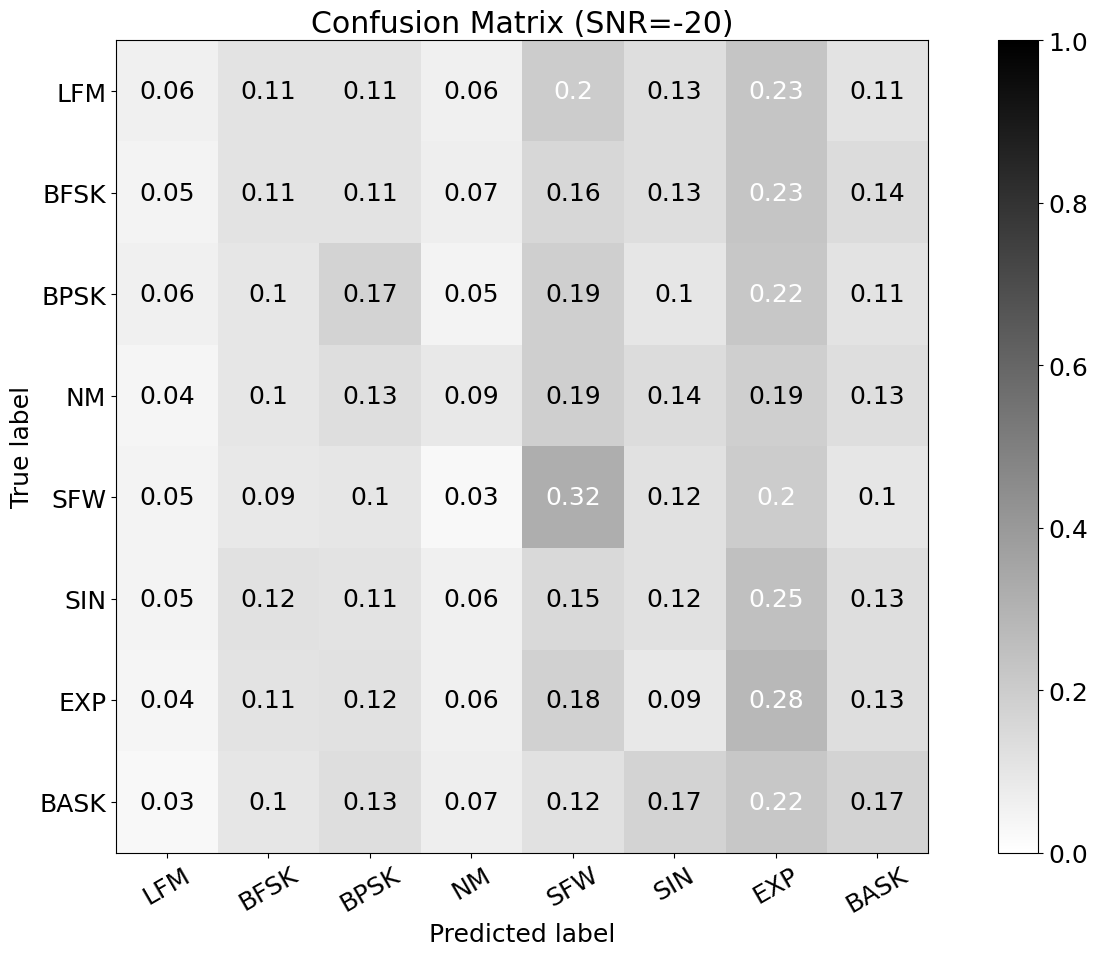

<Figure size 1800x1112.48 with 0 Axes>

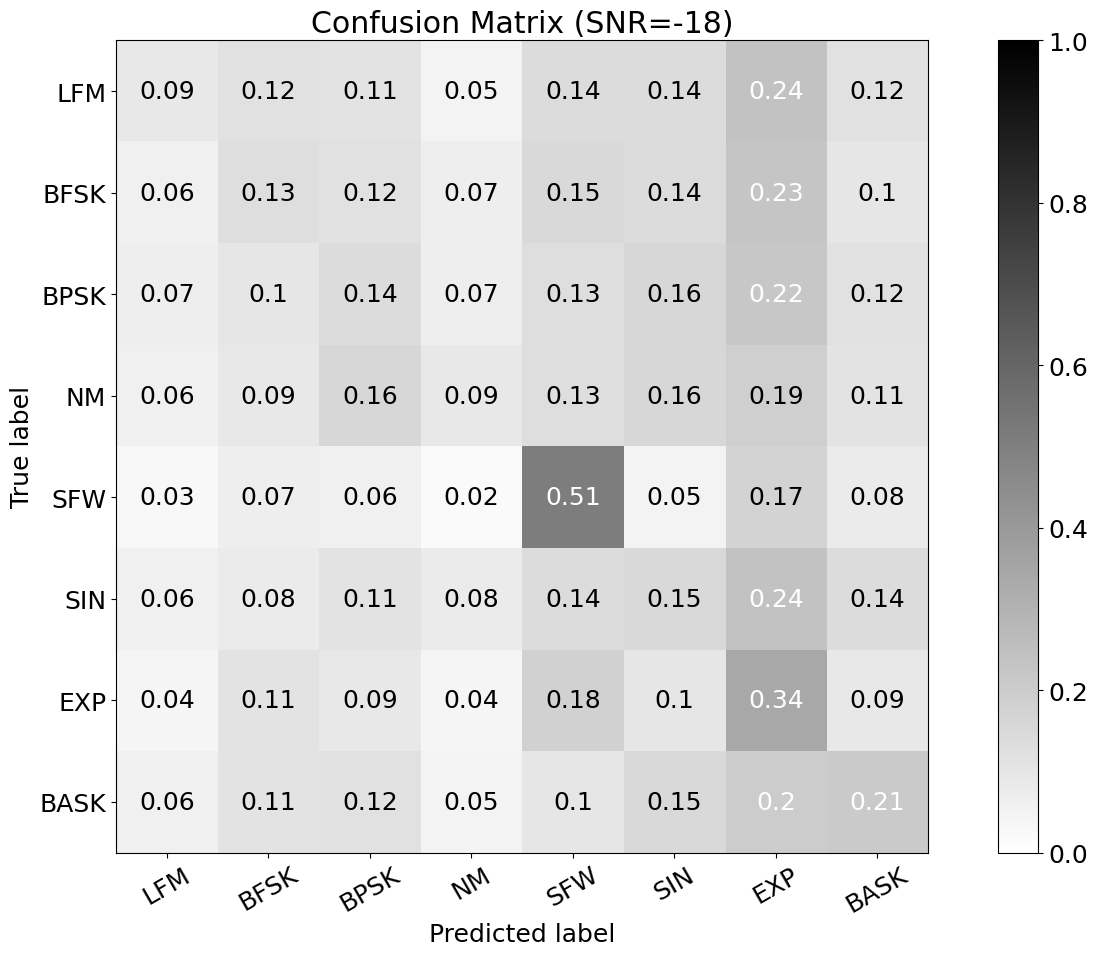

<Figure size 1800x1112.48 with 0 Axes>

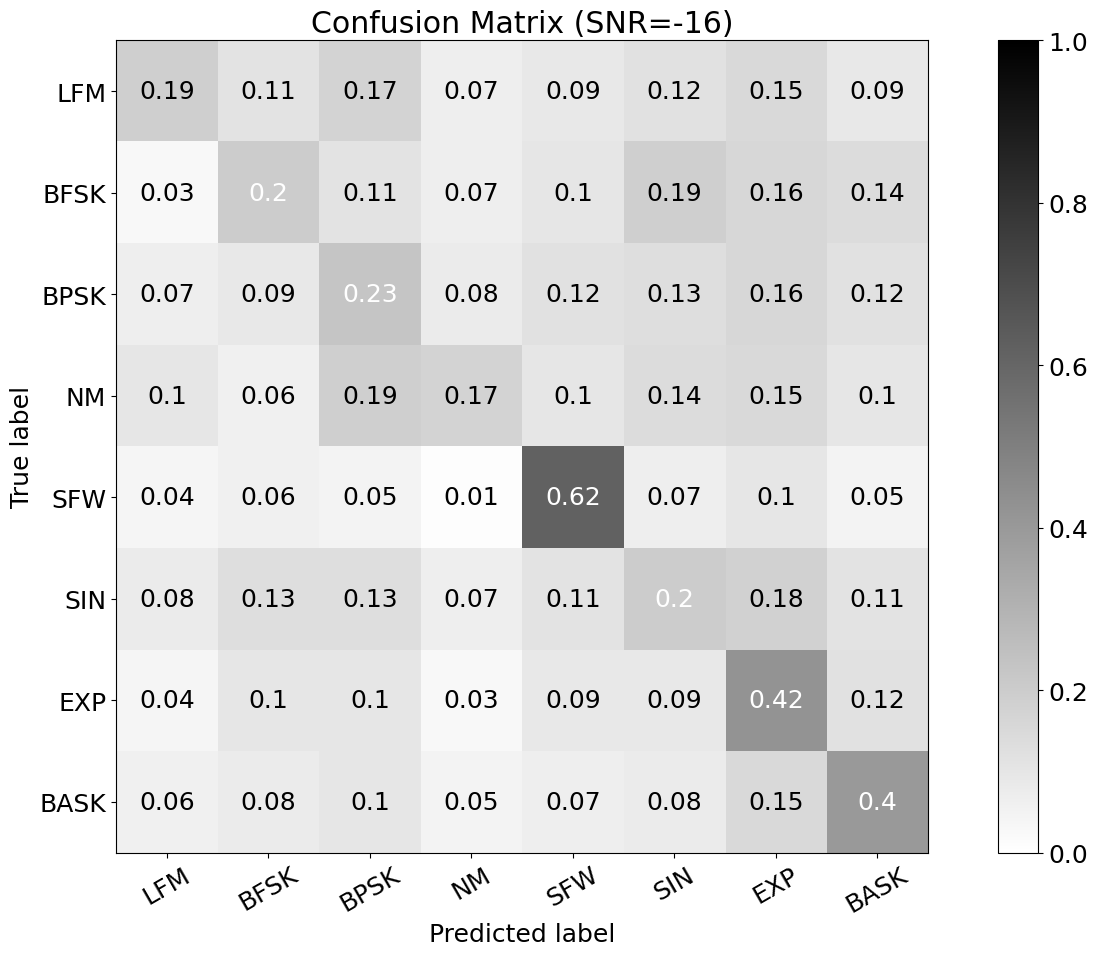

<Figure size 1800x1112.48 with 0 Axes>

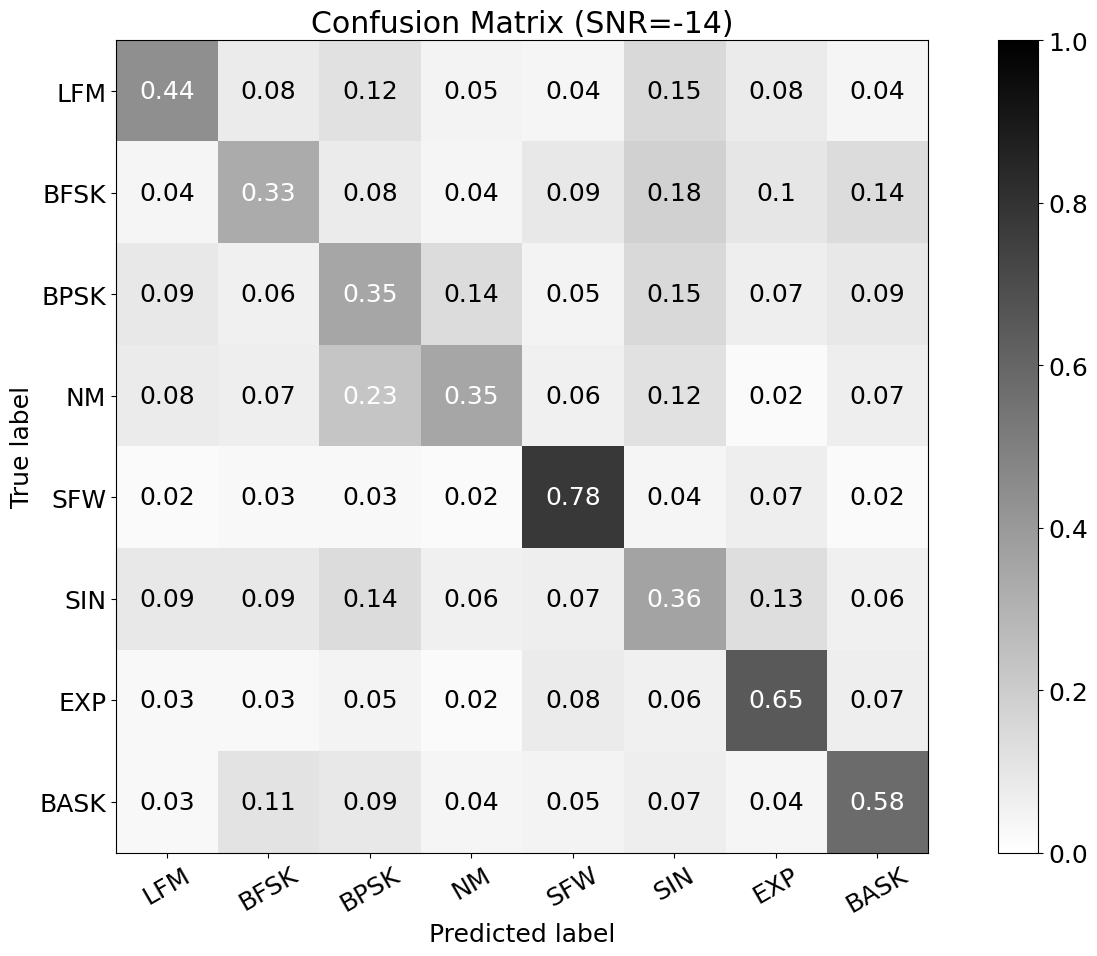

<Figure size 1800x1112.48 with 0 Axes>

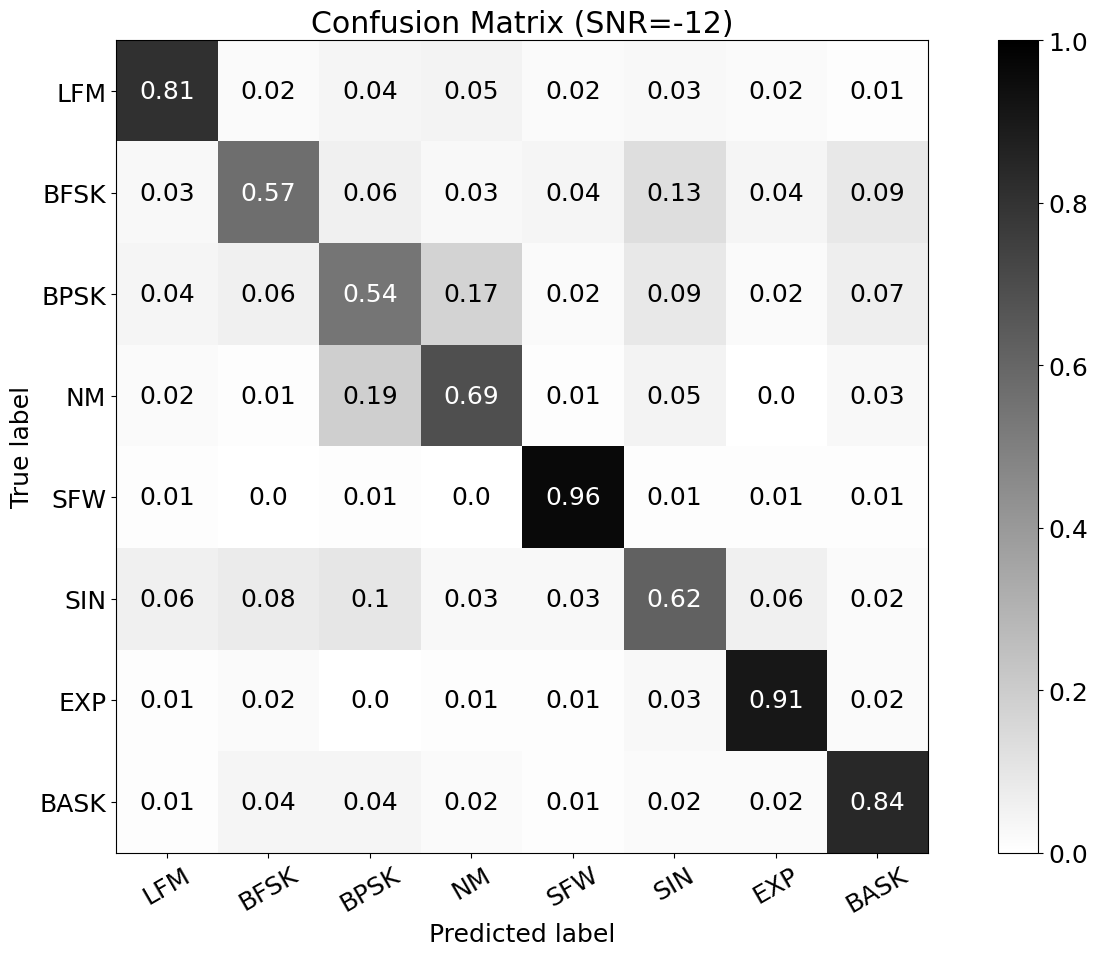

<Figure size 1800x1112.48 with 0 Axes>

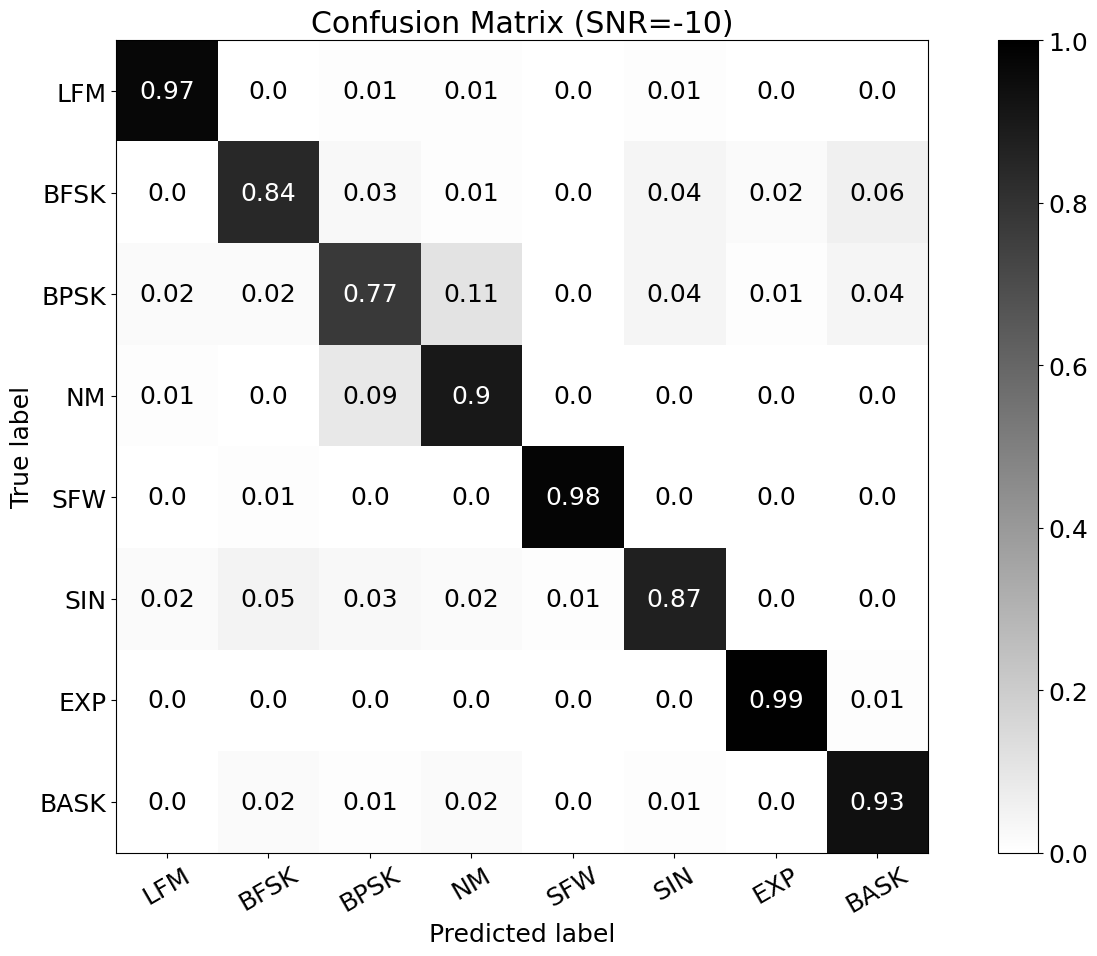

<Figure size 1800x1112.48 with 0 Axes>

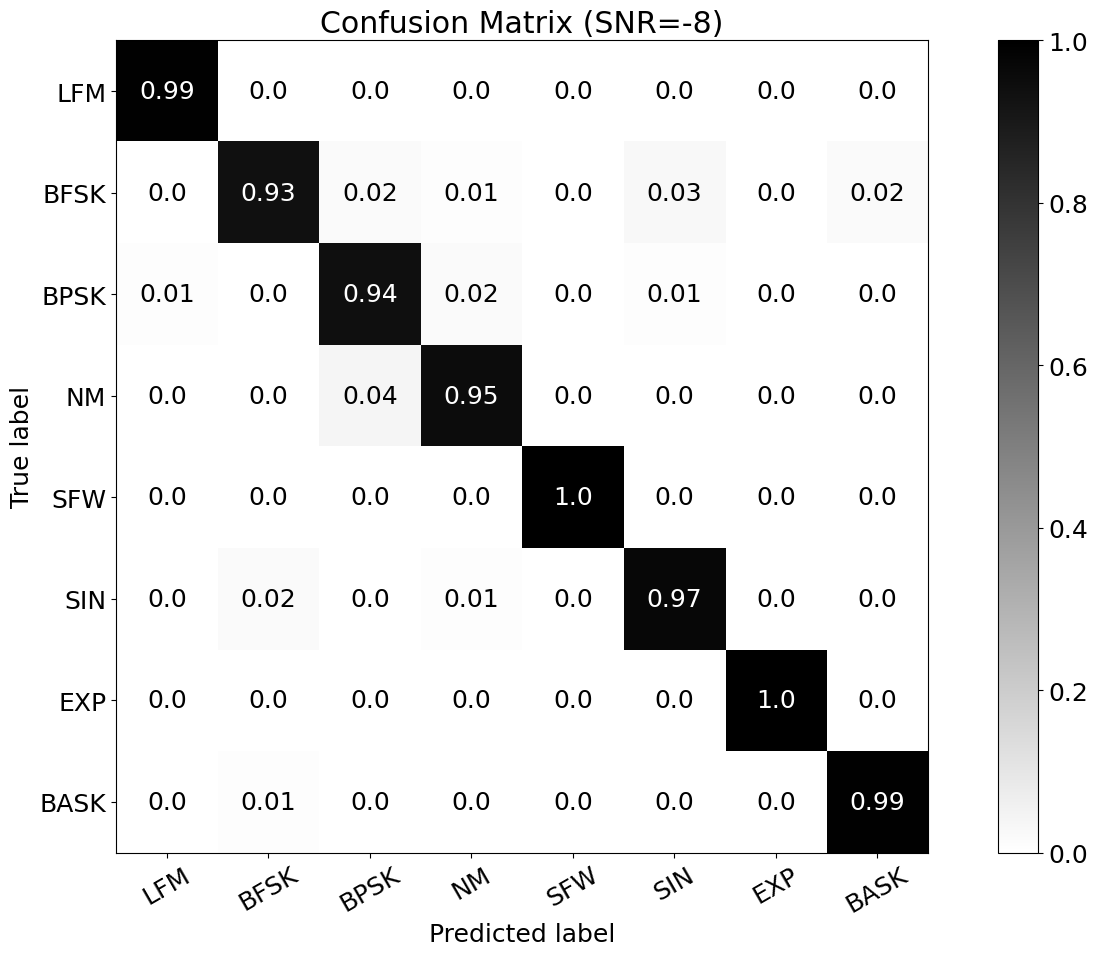

<Figure size 1800x1112.48 with 0 Axes>

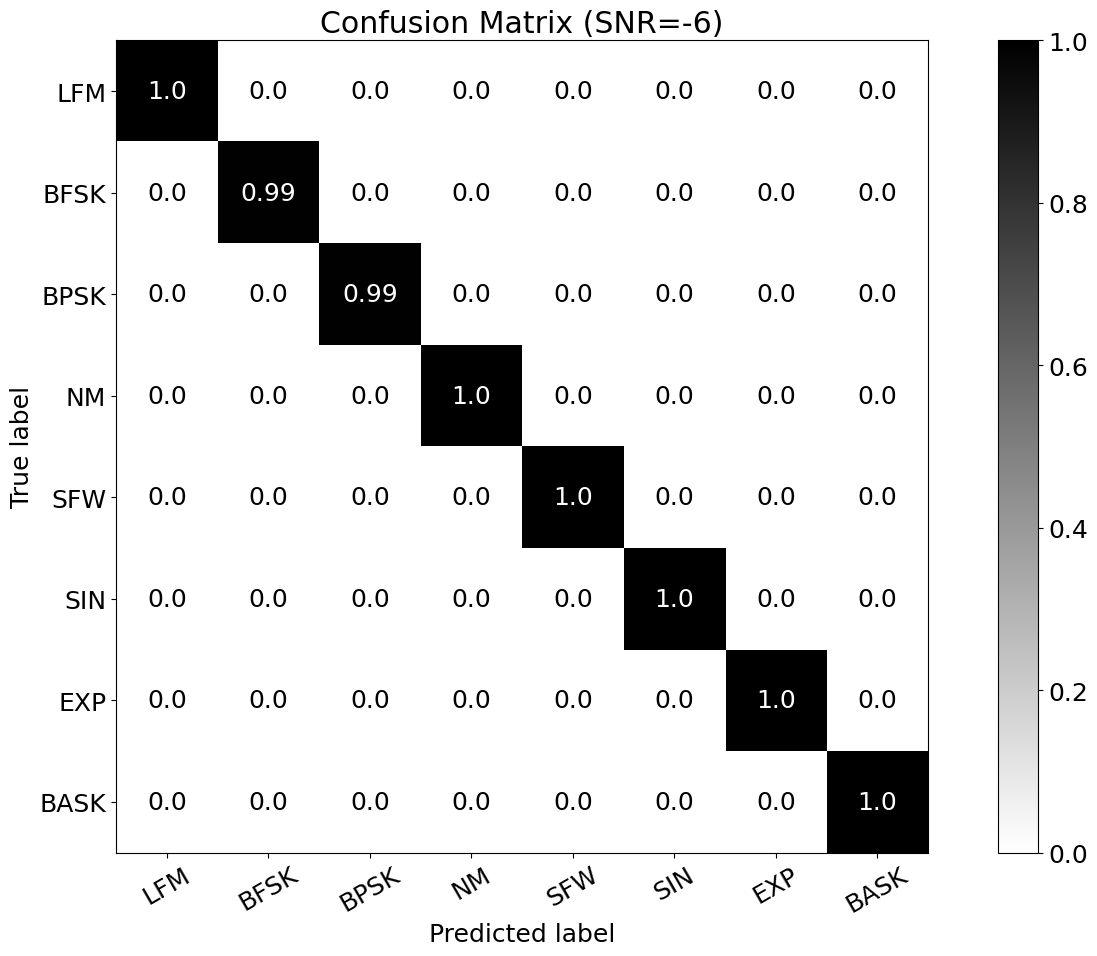

<Figure size 1800x1112.48 with 0 Axes>

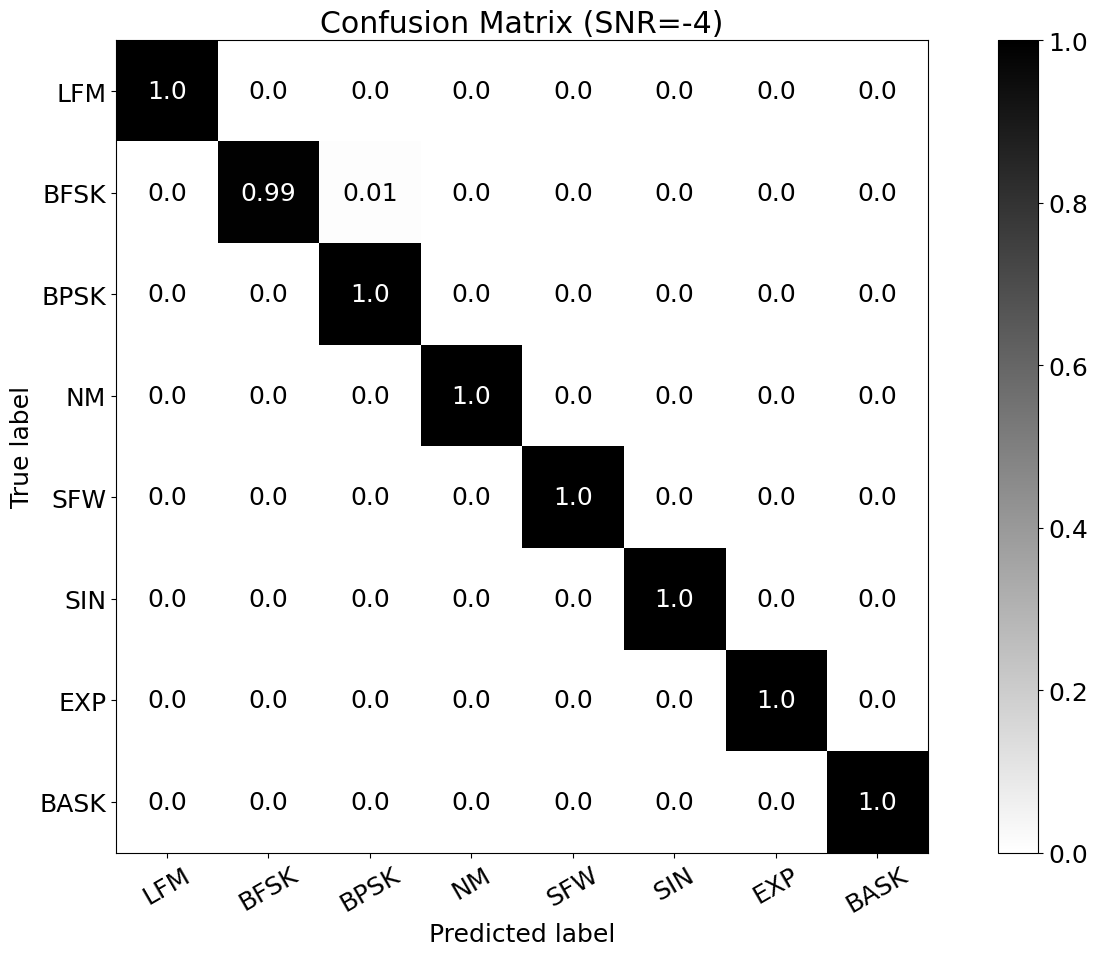

<Figure size 1800x1112.48 with 0 Axes>

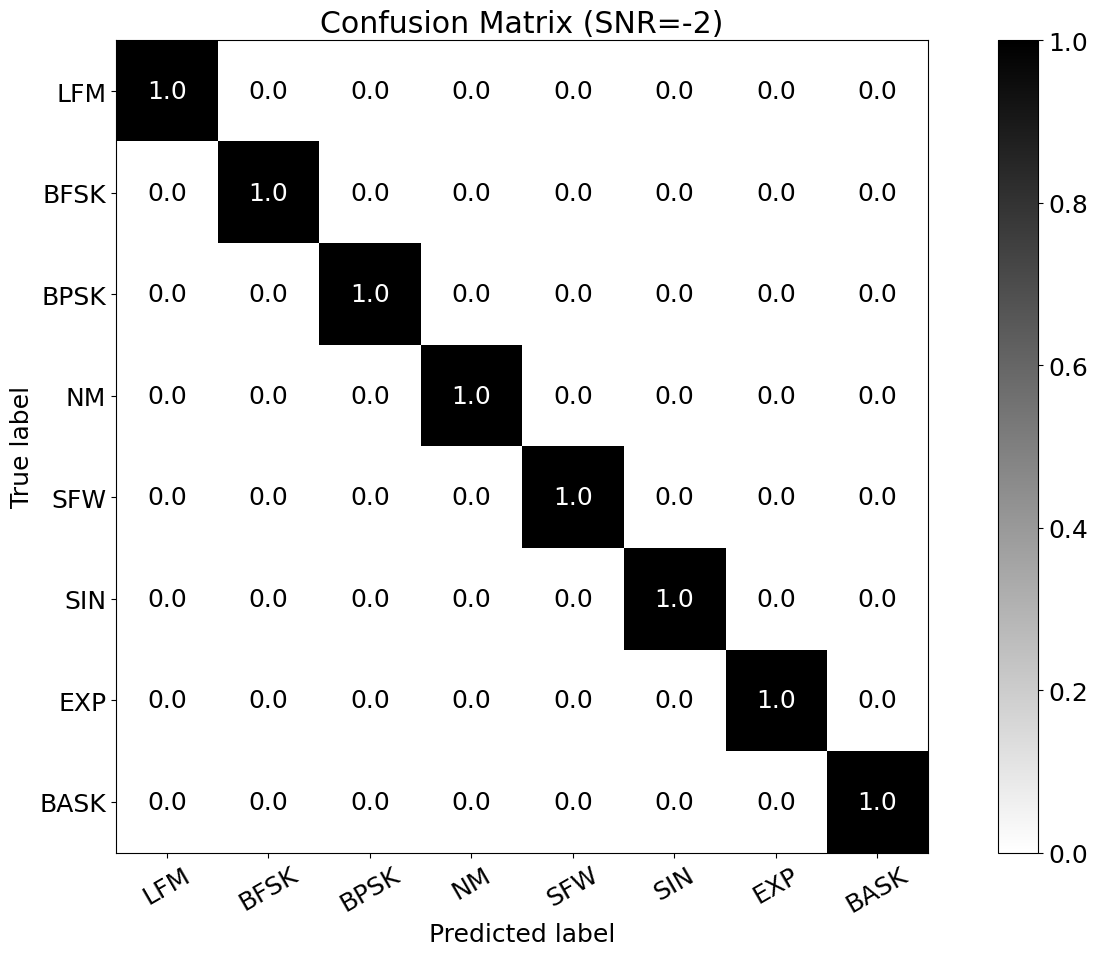

<Figure size 1800x1112.48 with 0 Axes>

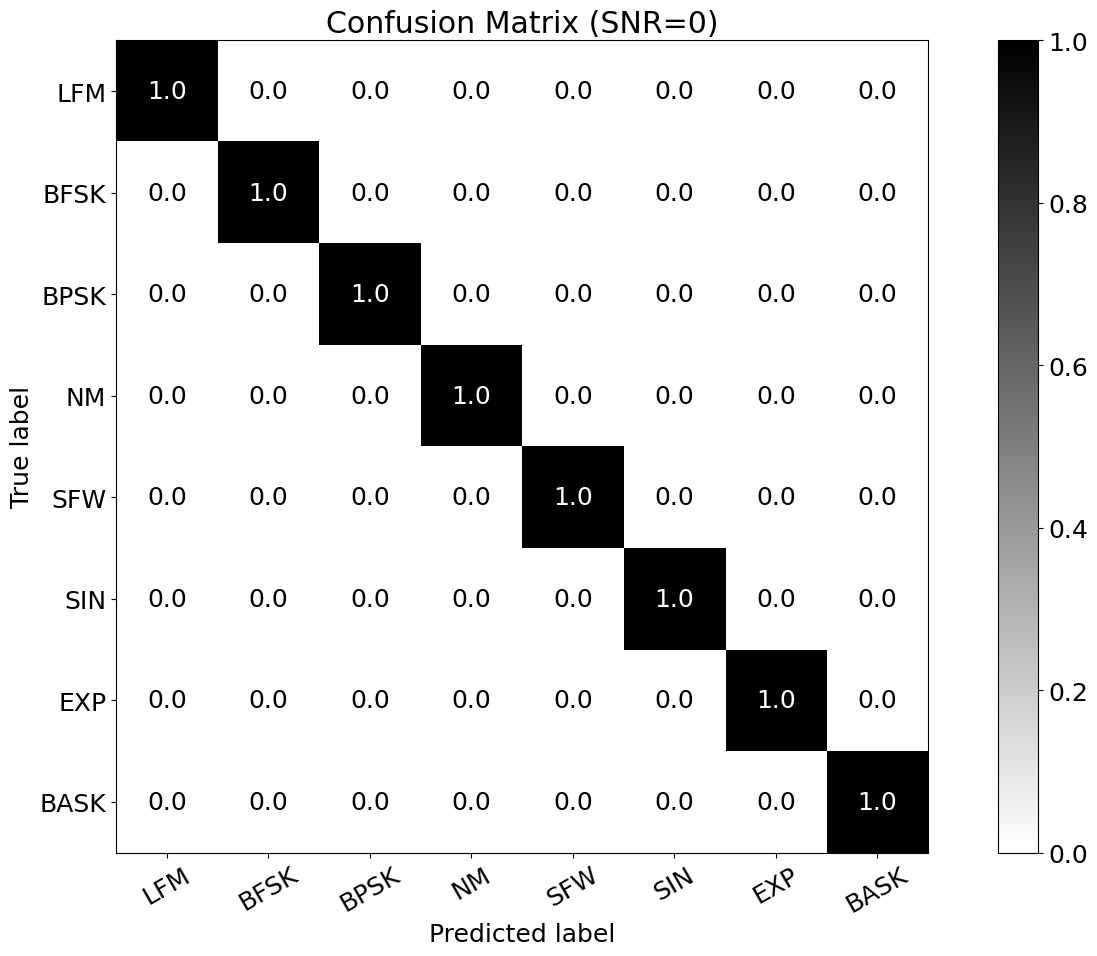

<Figure size 1800x1112.48 with 0 Axes>

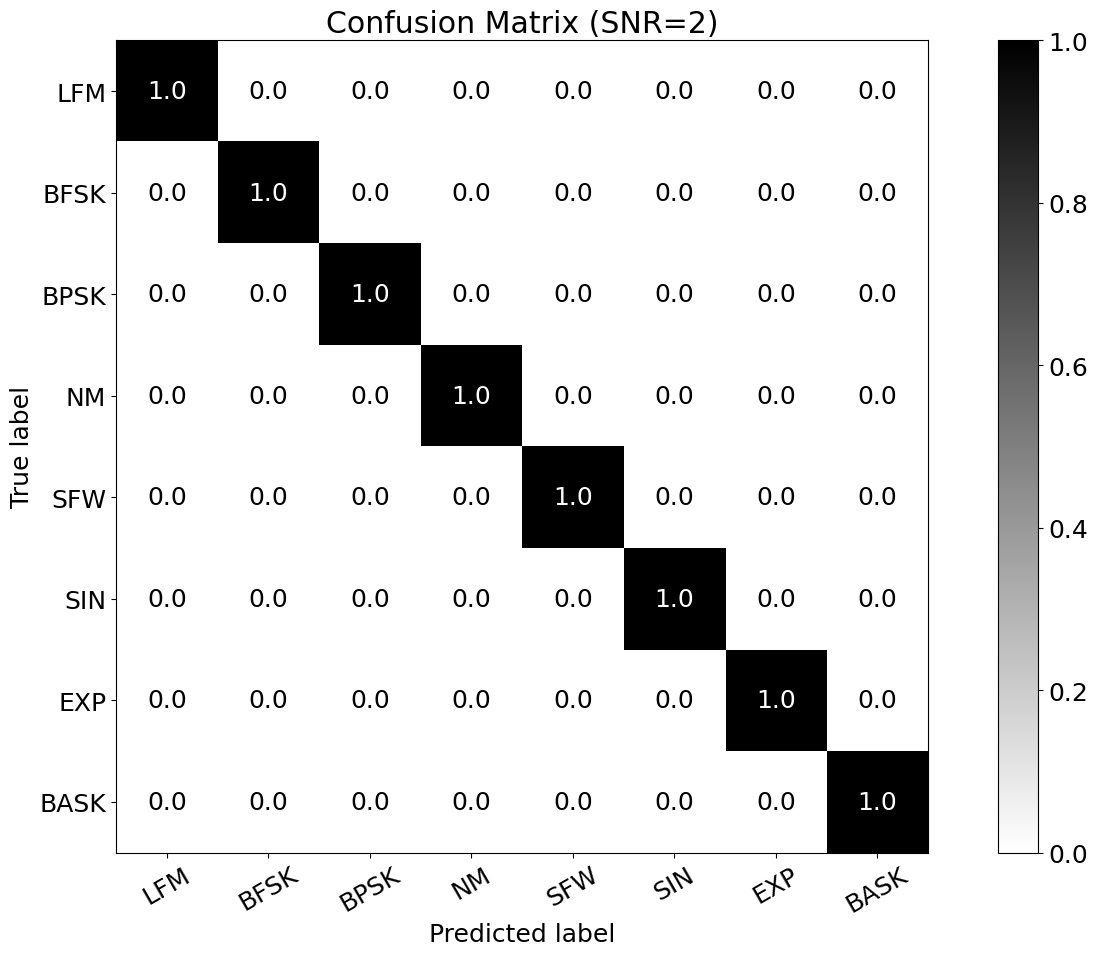

<Figure size 1800x1112.48 with 0 Axes>

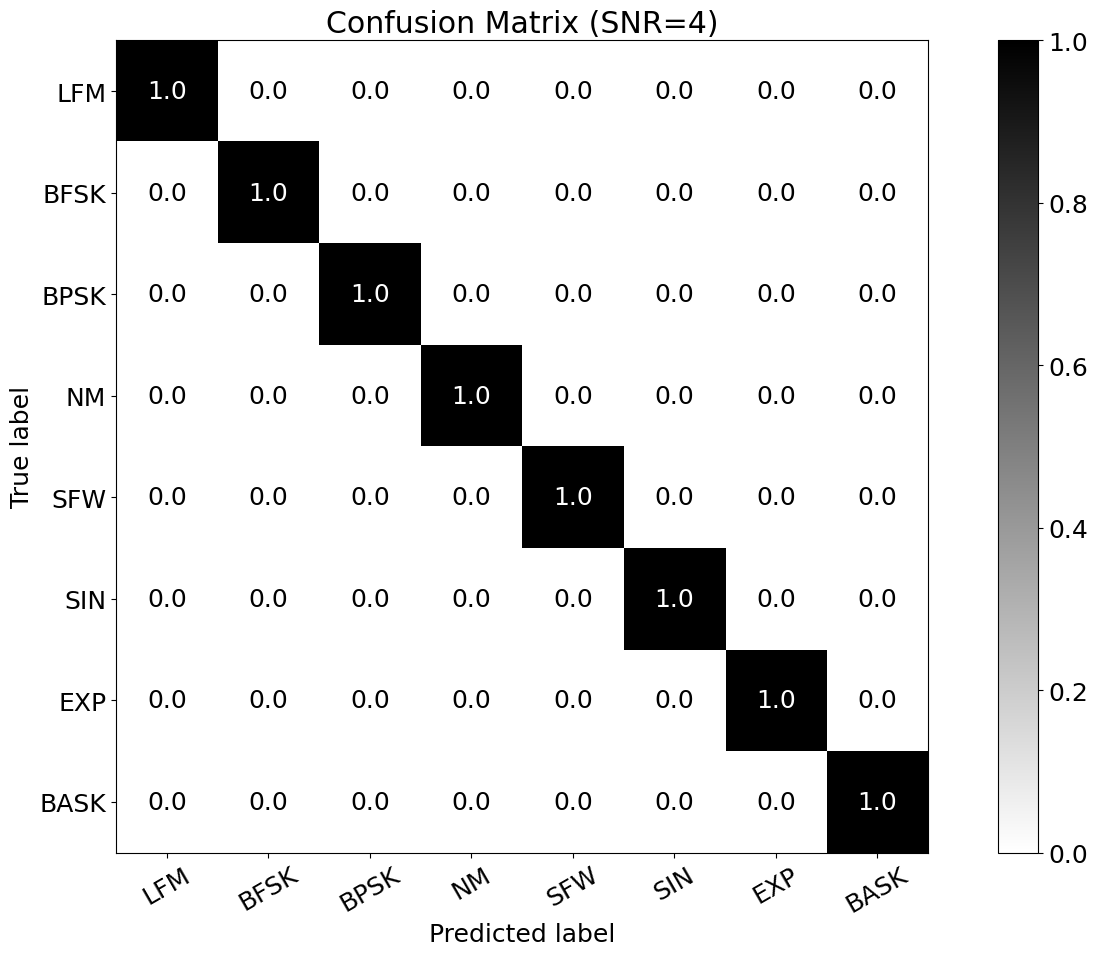

<Figure size 1800x1112.48 with 0 Axes>

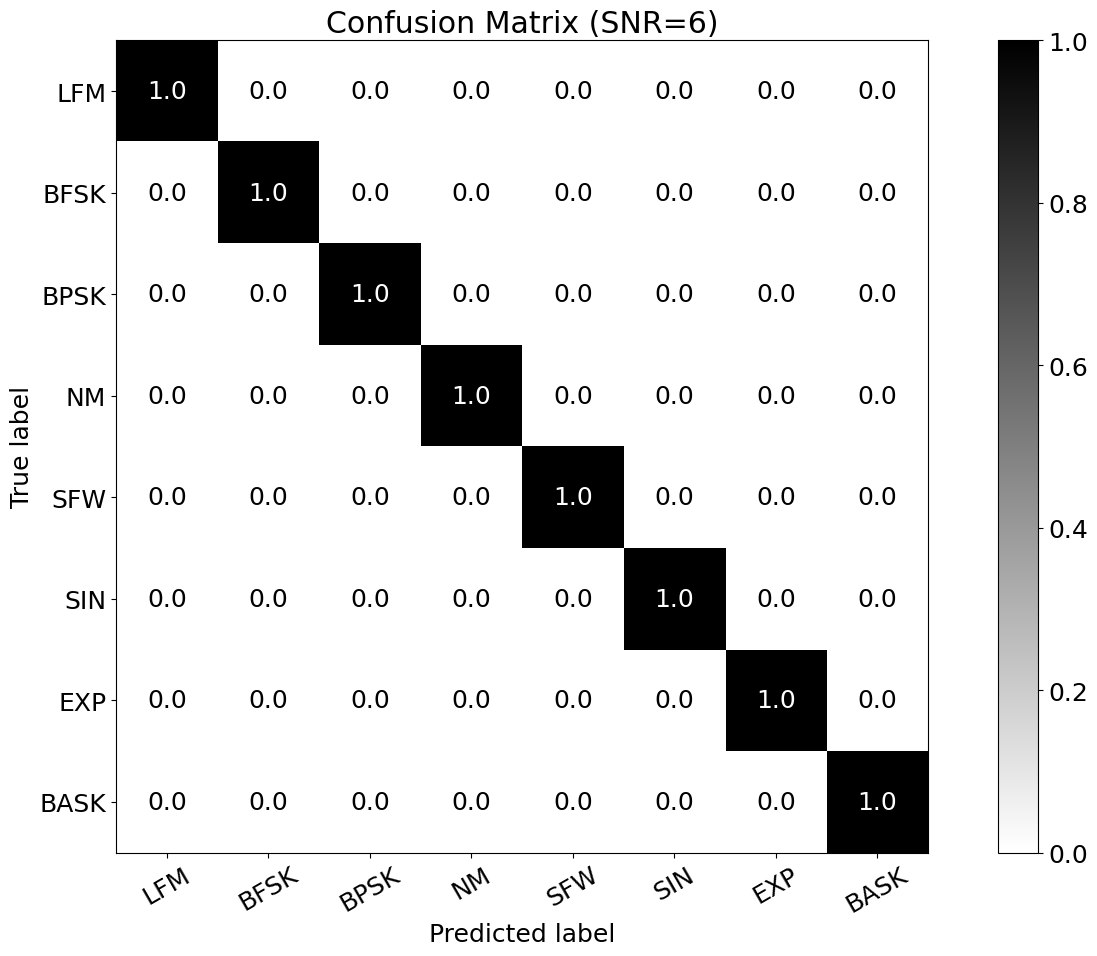

<Figure size 1800x1112.48 with 0 Axes>

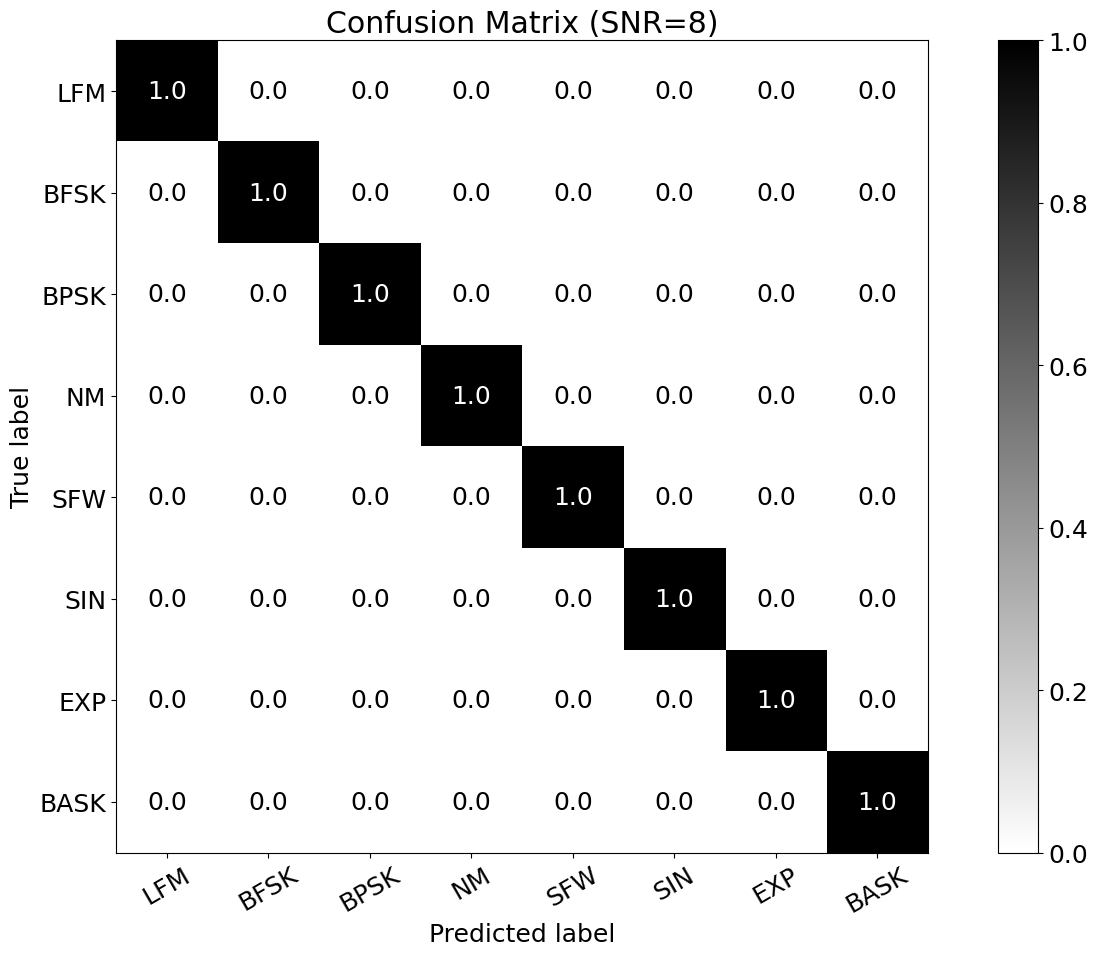

<Figure size 1800x1112.48 with 0 Axes>

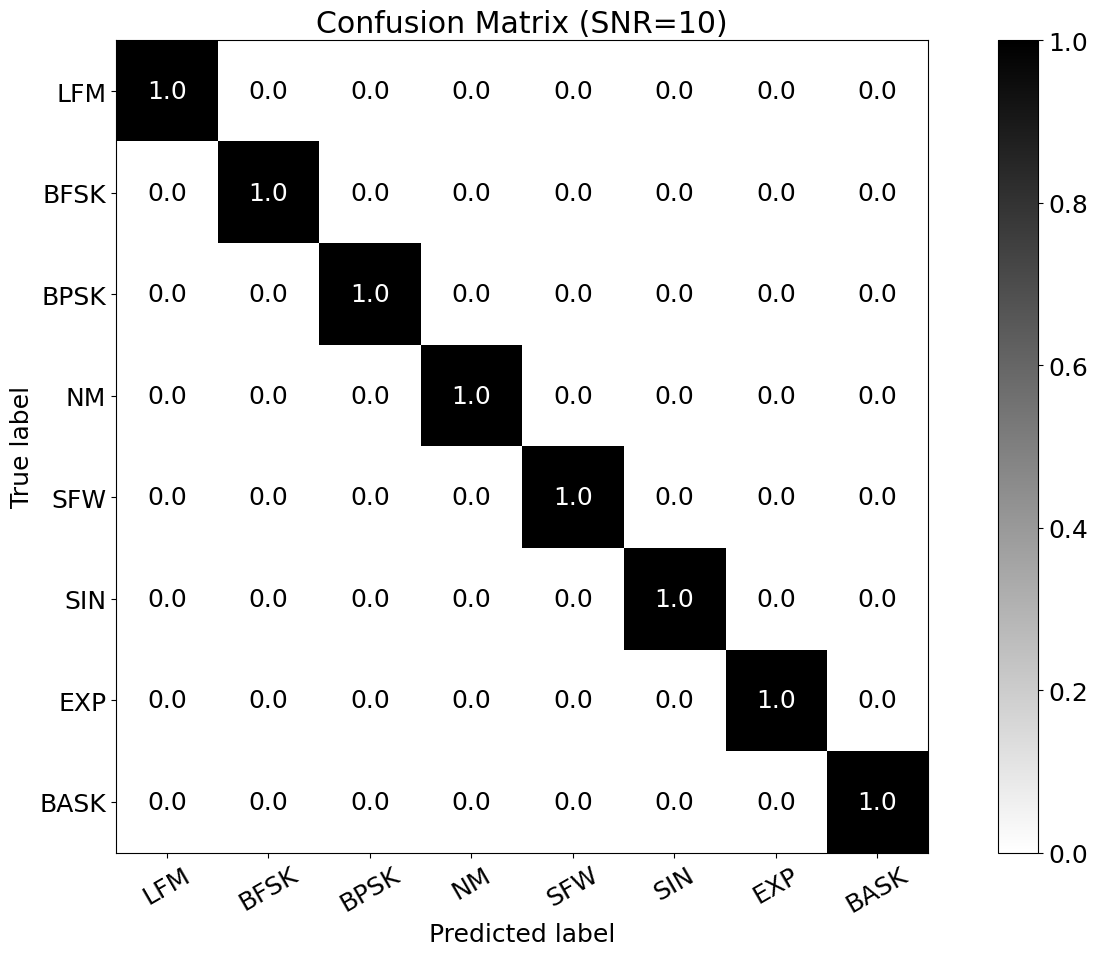

<Figure size 1800x1112.48 with 0 Axes>

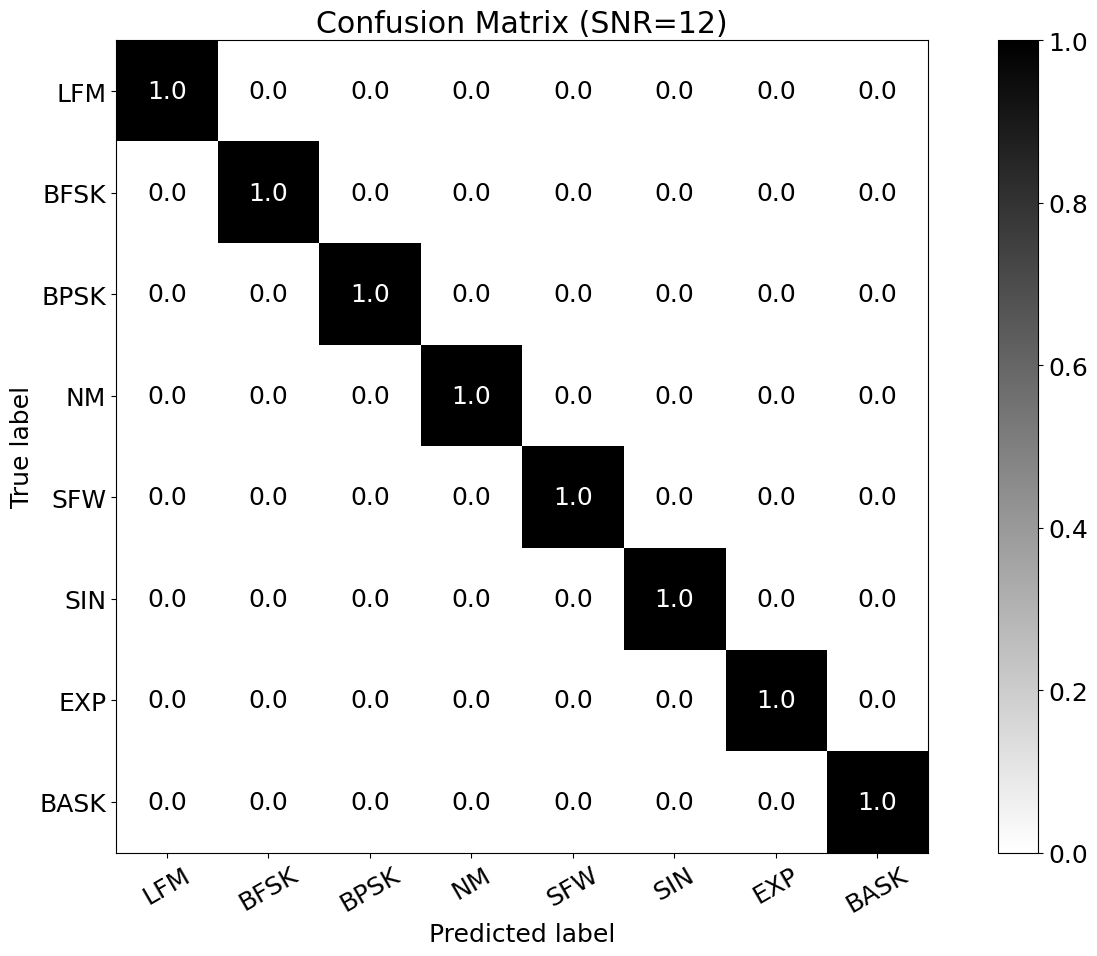

<Figure size 1800x1112.48 with 0 Axes>

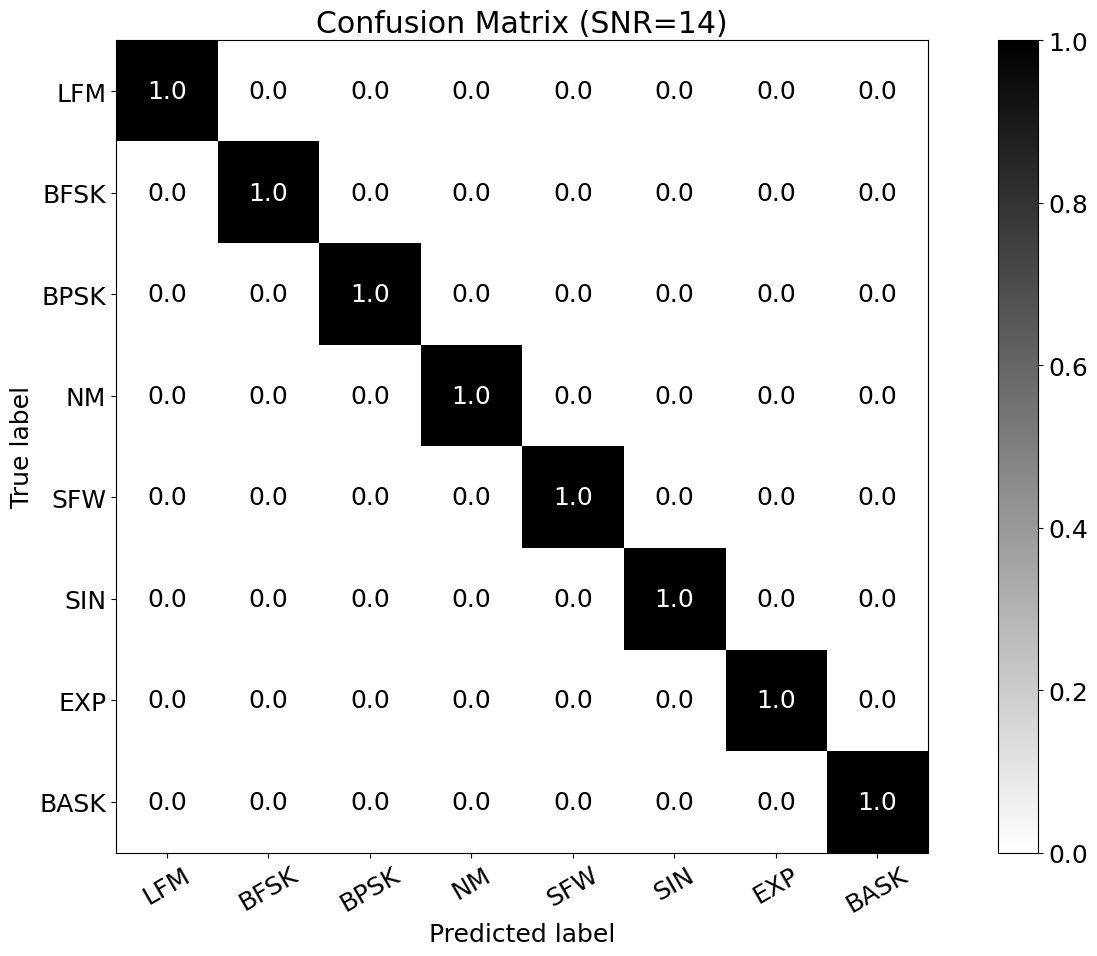

<Figure size 1800x1112.48 with 0 Axes>

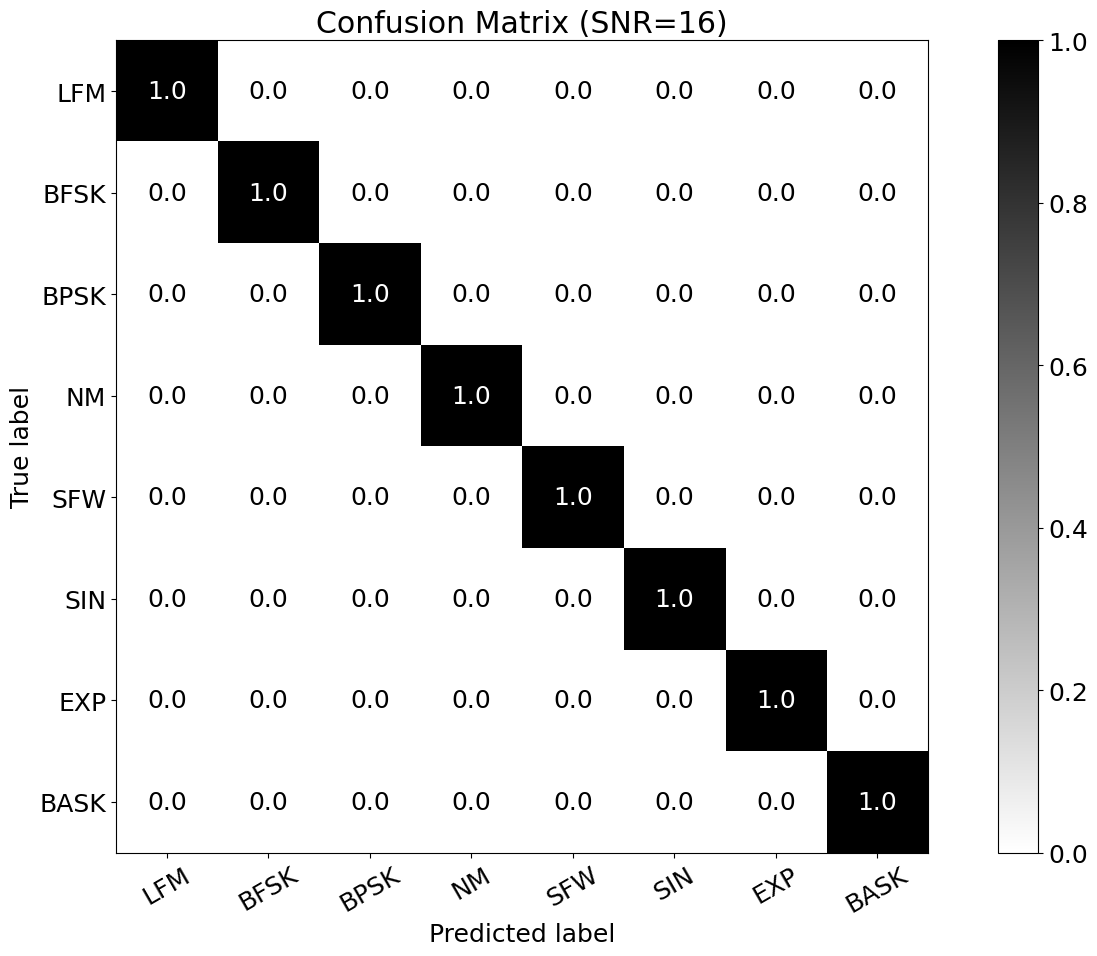

<Figure size 1800x1112.48 with 0 Axes>

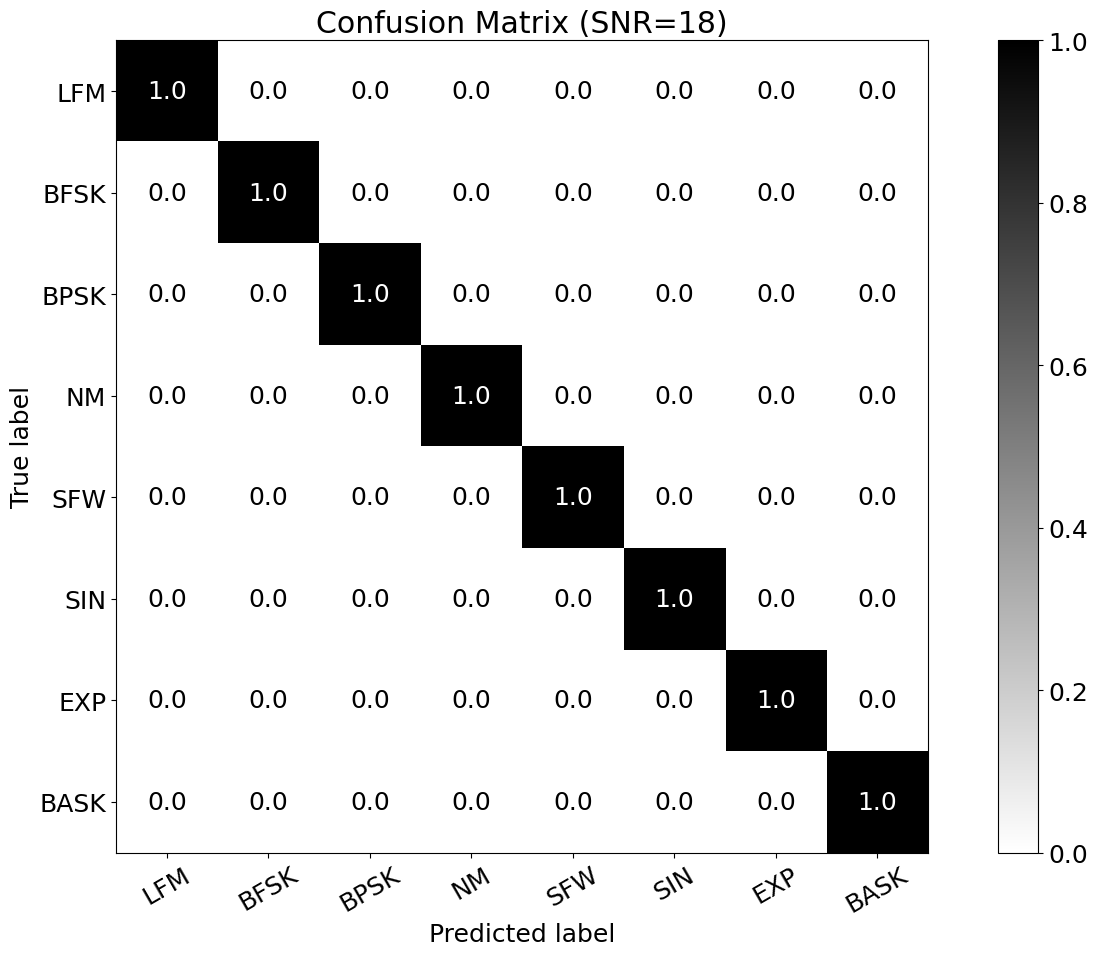

<Figure size 1800x1112.48 with 0 Axes>

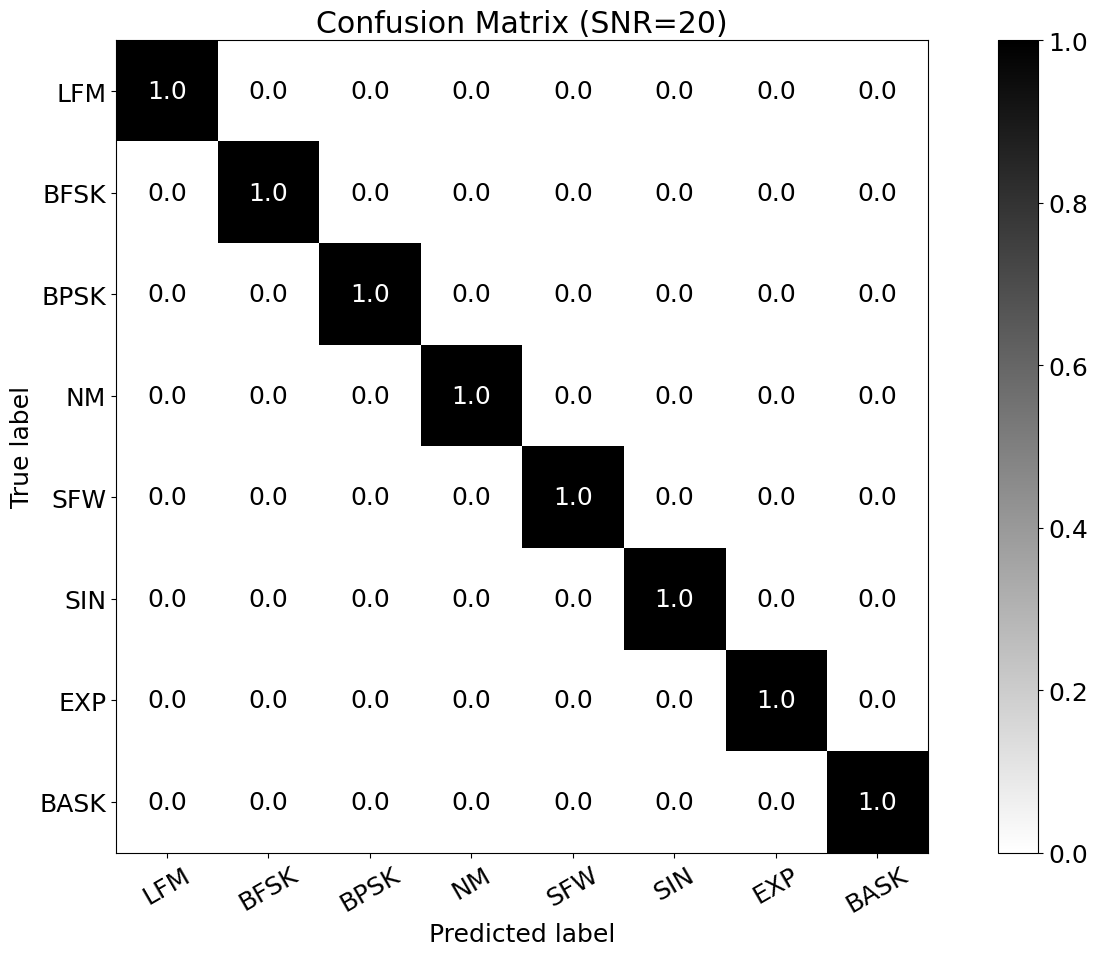

In [12]:

acc={}
for j,snr in enumerate(snrs):
    test_SNRs = list(map(lambda x: lbl_test[x][1], range(0,X_test.shape[0])))
    test_X_i = X_test[[i for i,x in enumerate(test_SNRs) if x==snr]]
    test_Y_i = Y_test[[i for i,x in enumerate(test_SNRs) if x==snr]]
    # estimate classes
    test_Y_i_hat = np.array(model.predict(test_X_i))
    cm = confusion_matrix(np.argmax(test_Y_i, 1), np.argmax(test_Y_i_hat,1))
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    cm_norm = np.nan_to_num(cm_norm)
    cm = np.round(cm_norm,2)
    for i in range(len(classes)):
        signal_class[classes[i]][j]= cm[i][i] 
    width = 18
    height = width / 1.618
    plt.figure(figsize=(width, height))
    plt = getConfusionMatrixPlot(np.argmax(test_Y_i, 1), np.argmax(test_Y_i_hat,1),title="Confusion Matrix (SNR=%d)"%(snr))
    plt.gcf().subplots_adjust(bottom=0.15)
    plt.savefig(output_path + '/graphs/confmat_'+str(snr)+'.png')
    conf = np.zeros([len(classes),len(classes)])
    confnorm = np.zeros([len(classes),len(classes)])
    for i in range(0,test_X_i.shape[0]):
        j = list(test_Y_i[i,:]).index(1)
        k = int(np.argmax(test_Y_i_hat[i,:]))
        conf[j,k] = conf[j,k] + 1
    for i in range(0,len(classes)):
        confnorm[i,:] = conf[i,:] / np.sum(conf[i,:])
    cor = np.sum(np.diag(conf))
    for i in range(0,len(classes)):
        confnorm[i,:] = conf[i,:] / np.sum(conf[i,:])

    cor = np.sum(np.diag(conf))
    ncor = np.sum(conf) - cor
    print("Overall Accuracy: ", cor / (cor+ncor))
    acc[snr] = 1.0*cor/(cor+ncor)
    with open(output_path + '/acc.json', 'w') as f:
        json.dump(acc, f)
        

In [12]:
with open(output_path + '/acc.json', 'w') as f:
    json.dump(acc, f)

In [27]:
acc

{-12: 0.3172463768115942,
 -10: 0.40159420289855075,
 -8: 0.5031884057971014,
 -6: 0.6086956521739131,
 -4: 0.6926086956521739,
 -2: 0.7720289855072464,
 0: 0.8360869565217391,
 2: 0.8736231884057971,
 4: 0.9050724637681159,
 6: 0.9184057971014493,
 8: 0.9260869565217391,
 10: 0.9388405797101449,
 12: 0.947536231884058,
 14: 0.9534782608695652,
 16: 0.9494202898550724,
 18: 0.9540579710144927,
 20: 0.9547826086956521}

In [13]:
acc_val = [val*100 for k,val in acc.items()]

In [17]:
len(acc_val)

17

In [21]:
lensnrs

[-12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]

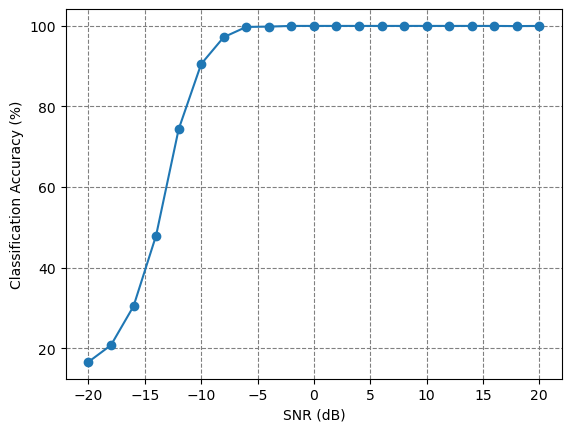

In [16]:
ticks = []
a = np.arange(28, 102, 2)
for i in a:
    if i %10 == 0:
        ticks.append(str(i))
    else:
        ticks.append("")
plt.plot(snrs, acc_val, marker='o')
#plt.xticks(snrs)
plt.grid(color = "grey", linewidth = "0.8", linestyle = "--")
plt.xlabel("SNR (dB)")
plt.ylabel("Classification Accuracy (%)")
plt.savefig(output_path + '/graphs/overall_accuracy.png')

In [25]:
for k,val in signal_class.items():
    signal_class[k] = list([v*100for v in val])
    

In [29]:
y_true = [2, 0, 2, 2, 0, 3, 3]
y_pred = [0, 0, 2, 2, 0, 2, 3]
confusion_matrix(y_true, y_pred)


array([[2, 0, 0],
       [1, 2, 0],
       [0, 1, 1]])

In [18]:
type(signal_class)

dict

In [26]:
with open(output_path + '/signal_acc.json', "w") as f:
    json.dump(signal_class, f)

In [21]:
import numpy

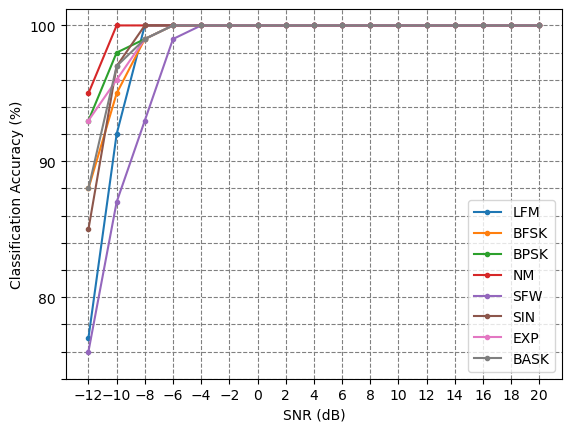

In [15]:
plt.figure()
ticks = []
a = np.arange(74, 102, 2)
for i in a:
    if i % 5 == 0:
        ticks.append(str(i))
    else:
        ticks.append("")
for i in range(len(classes)):
    plt.plot(snrs, signal_class[classes[i]], marker='.')
plt.legend(classes)
plt.yticks(a,ticks)
plt.xticks(snrs)
plt.grid(color = "grey", linewidth = "0.8", linestyle = "--")
plt.xlabel("SNR (dB)")
plt.ylabel("Classification Accuracy (%)")
plt.savefig(output_path+ '/graphs/signal_accuracy.png')